Name: __________________        Class: __________________     Date: __________________

<center>
    <img width="100%" src="https://raw.githubusercontent.com/astroDimitrios/AstronomyClass/master/DesignAssets/Ai/Banner3plainCut.png" alt='AP Logo'>
</center>

# Sunspots

### AIM - To measure the Suns rotation period using sunspots and visualise our results
Difficulty: Hard

<div class="alert alert-block alert-warning">
    <strong>Note</strong> - Some of the code will take up to a minute to run. Be patient! Make sure you are running this in an environment with SunPy installed.
</div>

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) How fast do you think the Sun rotates?  
2) Does it rotate at the same speed all over its surface?  
3) How could we use sunpots in a series of images to calculate the Suns rotation period?

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start](#Start)
* [Tracking Sunspots](#TRACK)
* [Calculating the Rotation Period](#ROTP)
* [Theoretical Rotation Curve](#THEORY)
* [Challenges](#Challenges)
* [References](#References)

## Let's go: <a class="anchor" id="Start"></a>

In this notebook we are going to look at sunspots and use them to measure the rotation period of the Sun. To do this we will need images of the photosphere which we can get using SunPy. We need HMI continuum images and the code below selects twelve to download for use to use. The images are each twelve hours apart. 
<div class="alert alert-block alert-success">
Import the required modules using the cell below then run the next cell to fetch the images.</div>

In [1]:
# run me
import numpy as np
from math import degrees
from IPython.display import Image
import sunpy.map
from sunpy.net import Fido, attrs as a
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import astropy.units as u
from astropy.utils.exceptions import AstropyWarning
import warnings
warnings.simplefilter('ignore', category=AstropyWarning)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib widget
# plt.ioff()

In [2]:
# run me
results = Fido.search(a.Time('2015/05/05 12:00', '2015/05/11 12:00'), a.Instrument('HMI'),
                      a.Sample(0.5*u.day), a.Physobs("intensity"))
files = Fido.fetch(results, path="./images/")

# sort the file names alphabetically using the python function sorted
# Your code here:
files = sorted(files)

results

Files Downloaded:   0%|          | 0/12 [00:00<?, ?file/s]

Start Time,End Time,Source,Instrument,Wavelength [2],Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info
,,,,Angstrom,,,,,,,Mibyte,
Time,Time,str3,str3,float64,str4,str9,str6,str4,str4,str8,float64,str26
2015-05-05 12:00:36.000,2015-05-05 12:00:37.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098,45sec. Continuum intensity
2015-05-06 00:00:36.000,2015-05-06 00:00:37.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098,45sec. Continuum intensity
2015-05-06 12:00:36.000,2015-05-06 12:00:37.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098,45sec. Continuum intensity
2015-05-07 00:00:36.000,2015-05-07 00:00:37.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098,45sec. Continuum intensity
2015-05-07 12:00:37.000,2015-05-07 12:00:38.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098,45sec. Continuum intensity
2015-05-08 00:00:37.000,2015-05-08 00:00:38.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098,45sec. Continuum intensity
2015-05-08 12:00:37.000,2015-05-08 12:00:38.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098,45sec. Continuum intensity
2015-05-09 00:00:37.000,2015-05-09 00:00:38.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098,45sec. Continuum intensity


Now we have twelve images of the Sun from the HMI instrument on the SDO (Solar Dynamics Observatory) telescope to use.
<div class="alert alert-block alert-success">
Complete the code below to look at the first image using Matplotlib's <strong>imshow()</strong>:</div>

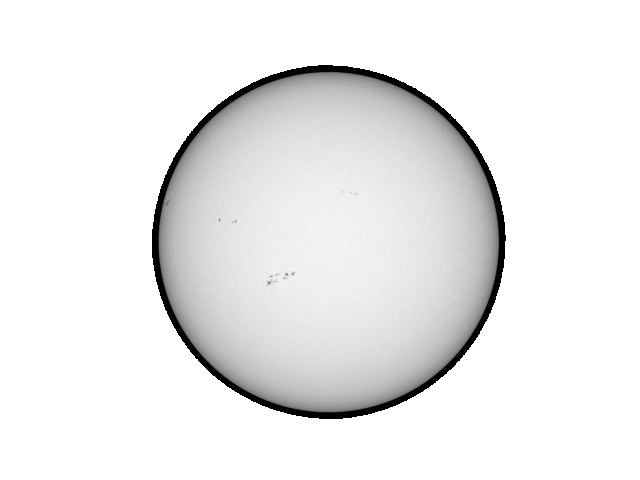

In [3]:
# load a sunpy Map from the first file in files (remember python indexes start at 0)
# Hint: Use sunpy.map.Map()
# Your code here:
smap = sunpy.map.Map(files[0])

smap = smap.resample((1024, 1024) * u.pix)
smap = smap.rotate(order=3)
fig = plt.imshow(smap.data, cmap='Greys_r', origin='lower')
plt.axis('off')
plt.show()

Wow! You should now have an interactive image of the Sun. Notice we shrunk the image by a factor of 4 using resample and rotated it so it looks like the view from Earth. Sunspots are dynamic objects which change in size and shape. Lets load an animation of Sun from the images we downloaded. You can see that some sunspots last longer than others and they all have a unique shape. The amount of sunspots varies with the 11 year solar cycle which we saw in the Solar Images notebook.

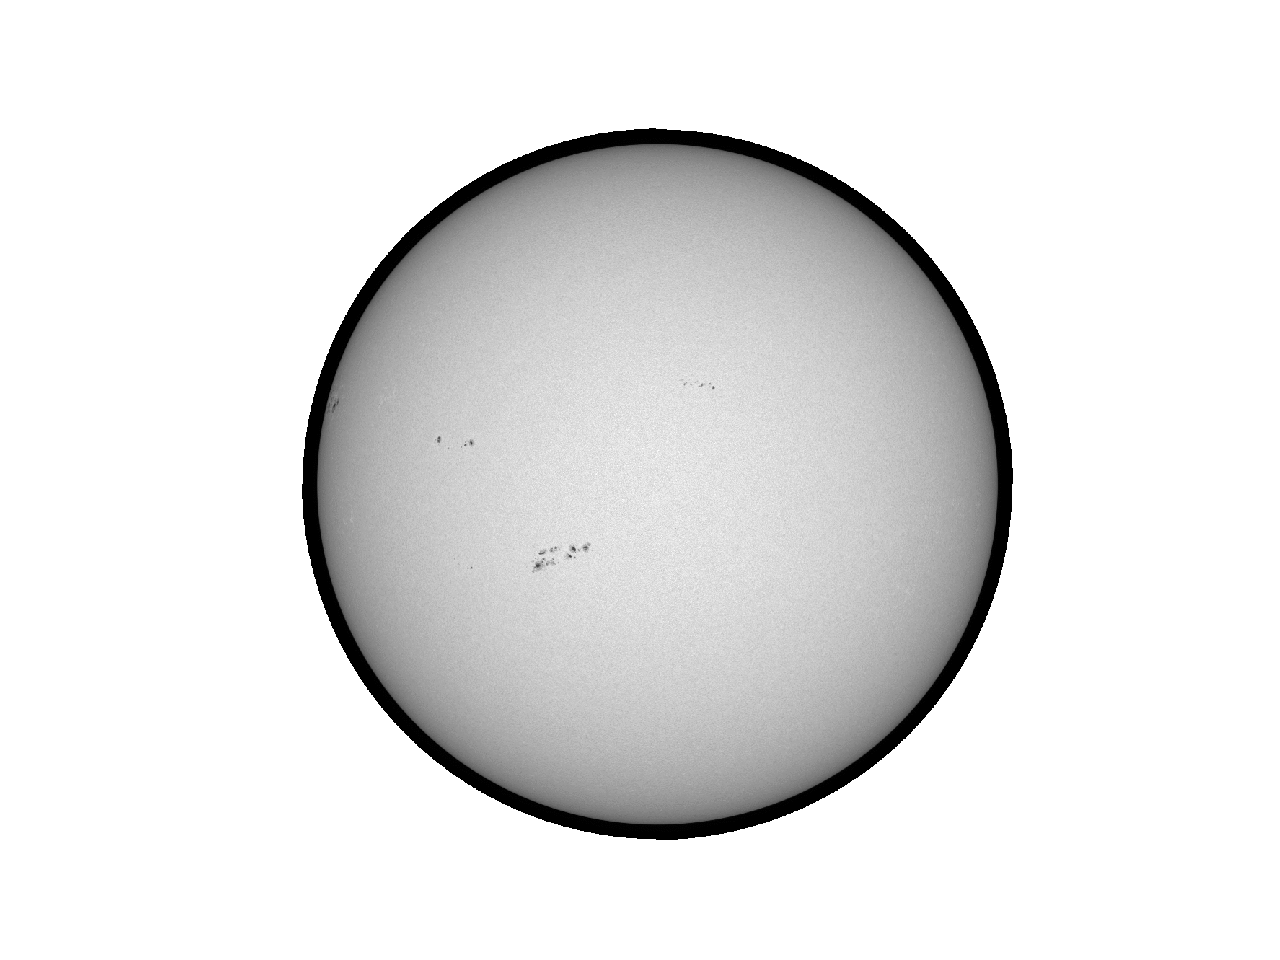

In [4]:
# run me
Image('./figures/sunspots.gif')

## Tracking Sunspots <a class="anchor" id="TRACK"></a>

By tracking the motion of sunspots over the surface of the Sun we can work out the Suns rotation period. To do this we need the x and y positions of a few sunspots. The widget below will let you cycle through the set of images we downloaded and make interactive plots of them. 

<div class="alert alert-block alert-success">
    
- Find three sunspots that persist for at least 6 images
- Hover over the first sunspot in the first image you chose and put the x and y coordinate into the numpy array <strong>sunspot1</strong> below
- Do the same for the other sunspots (put their coordinates into <strong>sunspot2</strong> and <strong>sunspot3</strong> respectively)
- Move to the next image and find the same sunspots. Again hover over the image and add the new x and y positions to the correct numpy array
    
</div>

In [5]:
# will take a minute
smaps = [((sunpy.map.Map(file)).resample((1024, 1024) * u.pix)).rotate(order=3) for file in files]

In [6]:
def map_gen(i):
    plt.figure()
    fig = plt.imshow(smaps[i-1].data, cmap='Greys_r', origin='lower')
    plt.axis('off')
    plt.show();
    
interactive_map = interactive(map_gen, i=widgets.ToggleButtons(
    options=[1,2,3,4,5,6,7,8,9,10,11,12],
    value=1, description='File:', disabled=False)) 
interactive_map

interactive(children=(ToggleButtons(description='File:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), valu…

In [7]:
# your full arrays should look like this:
# sunspot = np.array([[399 , 422],[453 , 424],[506 , 425],[559 , 424],[613 , 421],[666 , 419]])
# Your code here:
sunspot1 = np.array([[257 , 570],[307 , 573],[358 , 574],[411 , 575],[465 , 574],[520 , 575]])
sunspot2 = np.array([[172 , 628],[210 , 629],[251 , 630],[296 , 631],[343 , 632],[393 , 633]])
sunspot3 = np.array([[399 , 422],[453 , 424],[506 , 425],[559 , 424],[613 , 421],[666 , 419]])
sunspots = [sunspot1, sunspot2, sunspot3]

## Calculating the Rotation Period <a class="anchor" id="ROTP"></a>

Now you have the pixel positions of three sunspots from your images you can work out the rotation period of the Sun! You'll need to know some maths first!  

Run the next code cell. The motion of a sunspot across the face of the Sun is shown in the image below. If you plot the displacement of the sunspot's x coordinate from the centre of the Sun against time you get a sine curve! The realtionship between the x displacement and time is:

$$x = A sin\left(\frac{2\pi}{T}t\right)$$

where $A$ is the maximum displacement of a sunspot, at that solar latitude, from the line of 0 longitude ie the y-axis, and $T$ is the rotation period. This maths is visualised further in the theorySunspots notebook.

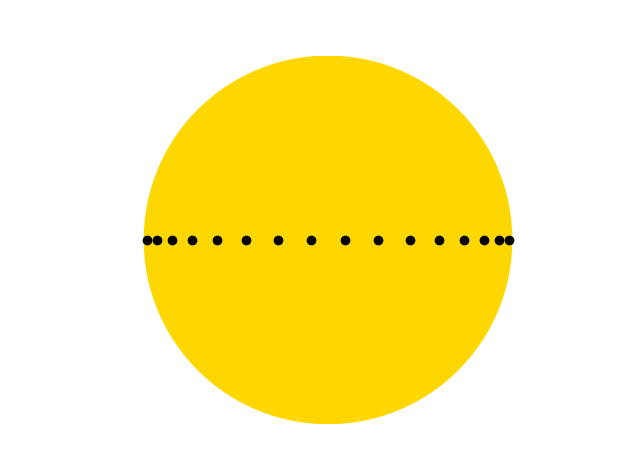

In [8]:
# run me
Image('./figures/theorySunspotsPath.png')

If we re-arrange our equation as follows:

$$arcsin\left(\frac{x}{A}\right) = \frac{2\pi}{T}t$$

Then by plotting $arcsin(x/A)$ against $t$ we can find the gradient $m$ which is equal to $\frac{2\pi}{T}$. Rearranging this gives us:

$$T = \frac{2\pi}{m}$$

Before we do this calculation we need $A$ for each sunspot. \
<div class="alert alert-block alert-success">
    We can get the average y value for each sunspot using the code in the next cell, all you need to do is turn <strong>y_avg</strong> into an integer.</div>

In [9]:
y_avg = [np.mean(sunspot[:,1]) for sunspot in sunspots]
# y_avg returned some decimals but pixel positions are integers - turn the y_avg values into integers below
# Your code here:
np.floor(y_avg)

array([573., 630., 422.])

<div class="alert alert-block alert-success">
    For each <strong>y_avg</strong> value:
    
1) Go to any of the interactive images above and hover until you find that y value
2) Move to the right edge of the disk and read off the x value (make sure the y value hasn't changed)
3) Put this in the array <strong>A</strong> below.
    </div>

In [10]:
# Here we take 512 off these x positions to get the max displacement A from the y-axis
A = np.array([ 982, 971, 977])-512
A

array([470, 459, 465])

Before we do our calculation and plot we have to remember we want the displacement in x and y from the centre of the sun. We have read off the pixel coordinates from our images. To get the displacements we need to take half the image width off the x and y positions.

<div class="alert alert-block alert-success">Calculate the sunspot displacements in x and y by subtracting 512 from each x and y value in the sunspot arrays.</div>

In [11]:
# calculate the displacements in x and y by subtracting 512 from each x and y sunspot array
# Your code here:
sunspots_disp = [sunspot - 512 for sunspot in sunspots]

sunspots_disp

[array([[-255,   58],
        [-205,   61],
        [-154,   62],
        [-101,   63],
        [ -47,   62],
        [   8,   63]]),
 array([[-340,  116],
        [-302,  117],
        [-261,  118],
        [-216,  119],
        [-169,  120],
        [-119,  121]]),
 array([[-113,  -90],
        [ -59,  -88],
        [  -6,  -87],
        [  47,  -88],
        [ 101,  -91],
        [ 154,  -93]])]

Now we can calculate the $arcsin(x/A)$ and make our first plot of $arcsin(x/A)$ vs $t$.
<div class="alert alert-block alert-success">
Complete the code below to:

- Calculate $arcsin(x/A)$ for each sunspot and store the arrays in a list
- Create an array of times from 0, 60 hours of length 6


Then run the second cell with the plotting code as is.
    </div>

In [12]:
arcsinxA = [np.arcsin(sunspots_disp[i][:,0]/A[i]) for i in range(len(sunspots))]

# create an array of times from 0 to 60 hours with the same number of points (6) as arcsinxA
# Your code here:
t = np.linspace(0, 5, 6)*12

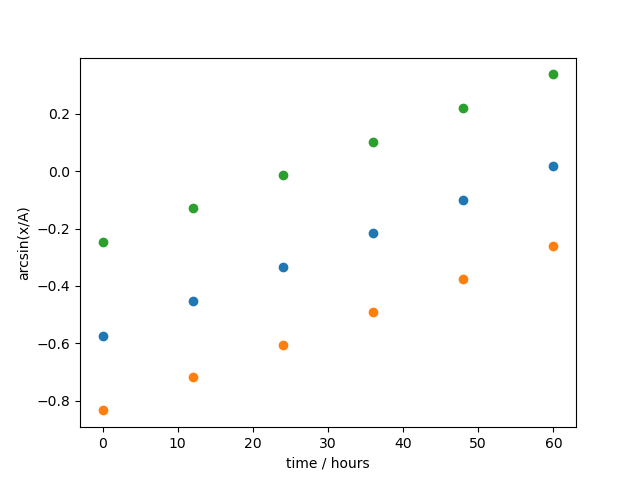

In [13]:
# run me
fig2 = plt.figure(num=2, figsize=(5, 5))
ax2 = fig2.add_subplot(111)
ax2.scatter(t, arcsinxA[0], label='Sunspot 1')
ax2.scatter(t, arcsinxA[1], label='Sunspot 2')
ax2.scatter(t, arcsinxA[2], label='Sunspot 3')
ax2.set_xlabel('time / hours')
ax2.set_ylabel('arcsin(x/A)')
plt.show()

Awesome. Let's add a trendline to our graph and use it to calculate the gradients. To do this we will use the ```np.polyfit()``` function.

In [14]:
# run me
fits = [np.polyfit(t, y, 1) for y in arcsinxA]
fits

[array([ 0.00981722, -0.57091091]),
 array([ 0.00951801, -0.8332703 ]),
 array([ 0.00968524, -0.24519755])]

Here the first value is the gradient and the second value is the intercept of the straight line fit. We can add them to our plot like this:

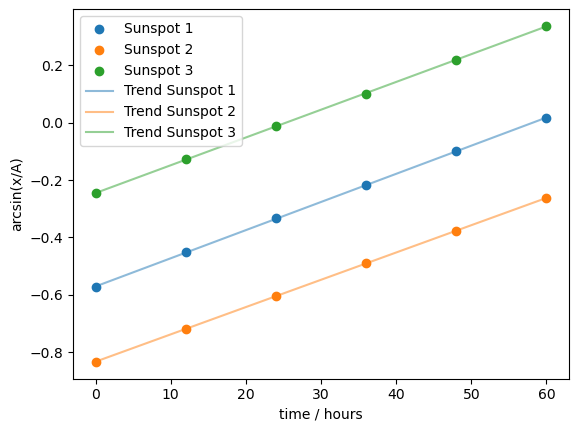

In [15]:
# run me then have a look at figure 2 again
ax2.plot(t, fits[0][0]*t+fits[0][1], label='Trend Sunspot 1', alpha=.5)
ax2.plot(t, fits[1][0]*t+fits[1][1], label='Trend Sunspot 2', alpha=.5)
ax2.plot(t, fits[2][0]*t+fits[2][1], label='Trend Sunspot 3', alpha=.5)
ax2.legend(loc='best')
fig2

Now let's calculate the $T$ values using the gradients and then plot them! 
<div class="alert alert-block alert-success">
Complete the code below to calcualte $T$:</div>

In [16]:
# use the formula T = 2pi/m to calculate the rotation period for each sunspot
# turn it into days by dividing by 24 hours
# Your code here:
T = [np.round(2*np.pi/fit[0]/24,1) for fit in fits]

T

[26.7, 27.5, 27.0]

Great! Now let's make one final plot of time period vs latitude. We can calculate the latitude of each sunspot like this:

In [17]:
# run me
lats = [np.round(degrees(np.arcsin((y-512)/512)),1) for y in y_avg]
lats

[6.9, 13.4, -10.1]

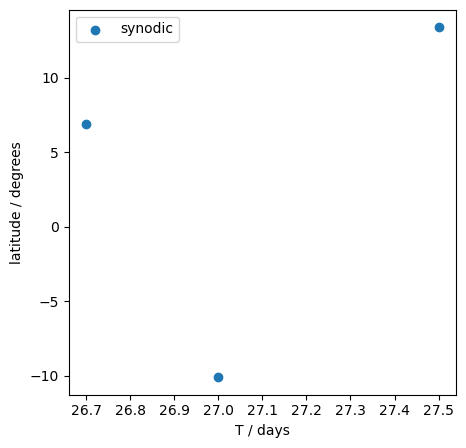

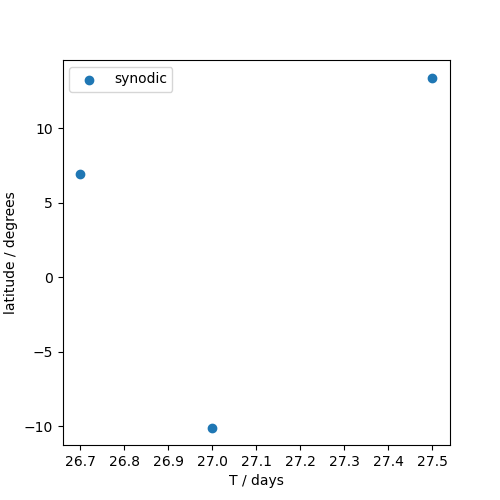

In [18]:
# run me
fig3 = plt.figure(num=3, figsize=(5, 5))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('T / days')
ax3.set_ylabel('latitude / degrees')
ax3.scatter(T, lats, label='synodic')
plt.legend()
fig3

## Theoretical Rotation Curve <a class="anchor" id="THEORY"></a>

You should see from your image that the Suns rotation period changes with latitude. SunPy can plot the theoretical rotation curve over our data so we can see how close we got to the correct values.

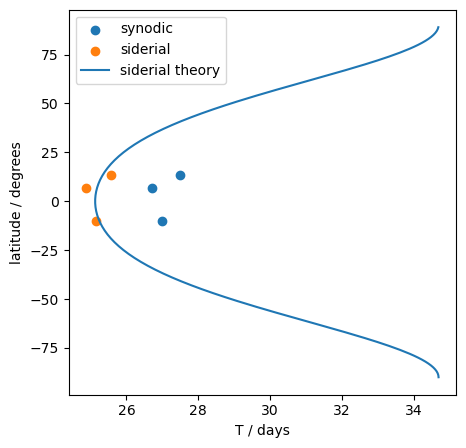

In [19]:
# run me
from sunpy.physics.differential_rotation import diff_rot

latitudesTheory = np.arange(-90, 90, 1) * u.deg
dt = 1 * u.day
rotation_rate = [diff_rot(dt, this_lat) / dt for this_lat in latitudesTheory]
rotation_period = [360 * u.deg / this_rate for this_rate in rotation_rate]

convert = 360/365.25
deg_per_day = [360/t + convert for t in T]
Tnew = [360/dpd for dpd in deg_per_day]

ax3.scatter(Tnew, lats, label='siderial')
ax3.plot([this_period.value for this_period in rotation_period], latitudesTheory, label='siderial theory')
plt.legend()
fig3

Notice how in the middle of the sun at 0 degrees the Sun rotates fastest, once every 25 days, whereas at the poles it rotates every 36 days. 

You will also notice a new set of markers much closer to the theoretical curve. These time periods have been corrected for the movement of the Earth around its orbit to give us the actual or siderial rotation of the Sun whereas the periods we calculated before were synodic periods. The synodic period is the time taken for the feature (sunspot) to return to the same position as viewed from the Earth which itself is rotating around the sun. The correction factor, how many degrees per day the Earth moves in its orbit, was added to the degrees per day we observed the sunspots moving.

Our data appears to be offset from the theoretical curve in part due to errors from our measurements of the pixel coordinates and errors introduced when resampling.

I suggest you look at the theorySunspots notebook for an explanation of the equation we used and the theoretical motion of a sunspot across the solar disk.

<div class="alert alert-block alert-success">
Finally the cell below will draw one of the images again. 
    
- Choose one which has all the sunspots you tracked in it
- In the second cell below there is example code on how to make a rectangle appear on the image. Place a rectangle around all the sunspots you tracked and then use the last code cell to save the image
    </div>

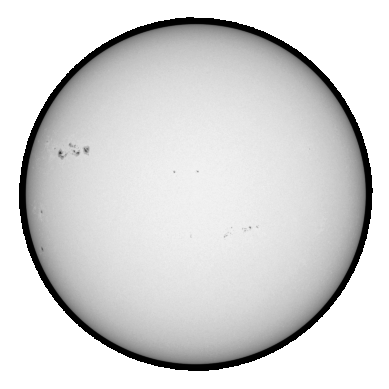

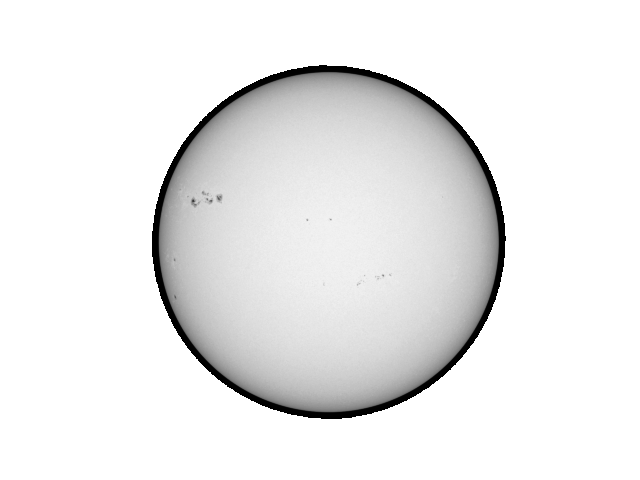

In [20]:
fig4, ax4 = plt.subplots(1)
ax4.imshow(smaps[5].data, cmap='Greys_r', origin='lower')
plt.axis('off')
fig4

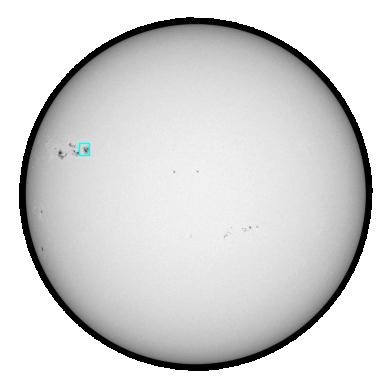

In [21]:
# Adapt this template to put a rectangle around each sunspot you tracked
# you'll need to copy and paste the code twice below in this cell then change the numbers
# Create a Rectangle patch bottom right corner coordinates in the (, ) and width then height
rect = patches.Rectangle((190,620),30,35,linewidth=1,edgecolor='cyan',facecolor='none')
# Add the patch to the Axes
ax4.add_patch(rect)

fig4

In [22]:
plt.savefig('myTrackedSunspots.png', dpi=200)

## Challenge <a class="anchor" id="Challenges"></a>

It would be great if this process was automated! Why not have a go at automating the process yourself.

The file ***sunspotsAuto.py*** has my attempt to automate sunspot detection using ***stara.py*** (see references below), scikit-learn and scikit-image which are image and machine learning modules in python. **Note** - The ***sunspotsAuto.py*** is not updated like this notebook so it may not work with minor fixes!

## References <a class="anchor" id="References"></a>

1) SunPy - Differential Rotation Code - https://docs.sunpy.org/en/stable/generated/gallery/plotting/simple_differential_rotation.html  
2) Stuart Mumford - stara.py - https://github.com/Cadair/sunspot_experiments/blob/master/  
3) scikit-learn - Clustering - https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering  
4) Roša, D., Brajša, R., Vršnak, B. et al. The relation between the synodic and sidereal rotation period of the Sun. Sol Phys 159, 393–398 (1995). https://doi.org/10.1007/BF00686540  
5) scienceinschool - Measuring Solar Rotation - https://www.scienceinschool.org/content/sunspots-rotating-sun

## Sharing

If you share, use or modify this activity in any way use the citation in this [txt file](https://github.com/astroDimitrios/Astronomy/blob/master/CITATION.txt).    
Please contact me at astrodimitrios@gmail.com with any suggestions, mistakes found, or general questions about teaching astronomy with Python.

© Dimitrios Theodorakis GNU General Public License v3.0 


https://github.com/astroDimitrios/Astronomy  